In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def euler_explicito(func, x_0, t_0, t_f, N):
    '''Metodo de euler explicito
    * func es la X(t) derivada con respecto a la variable independiente
    que toma como primer argumento la variable independiente y como segundo X(t)
    * x_0 es el valor inicial de x
    * t_0 es el valor inicial de la variable independiente
    * t_f es el valor final de la variable independiente
    * N es la cantidad de pasos
    '''
    X = [x_0]
    h = (t_f - t_0)/N
    T = np.arange(t_0, t_f+h, h)
    for i in range(1, N+1):
        X.append(X[i-1] + h*func(T[i-1], X[i-1]))
    return T, X
def taylor_orden_2(func, func_t, func_x, x_0, t_0, t_f, N):
    '''Metodo de taylor de orden 2
    * func es la X(t) derivada con respecto a la variable independiente
    que toma como primer argumento la variable independiente y como segundo X(t)
    * func_t es la derivada total de func respecto a la variable independiente
    * func_x es la derivada total de func respecto a X(t)
    * x_0 es el valor inicial de x
    * t_0 es el valor inicial de la variable independiente
    * t_f es el valor final de la variable independiente
    * N es la cantidad de pasos
    '''
    X = [x_0]
    h = (t_f - t_0)/N
    T = np.arange(t_0, t_f+h, h)
    for i in range(1, N+1):
        A = X[i-1] + h*func(T[i-1], X[i-1])
        B = (h**2)*(func_t(T[i-1], X[i-1])+func_x(T[i-1], X[i-1])*func(T[i-1], X[i-1]))/2
        X.append(A+B)
    return T, X

In [34]:
func = lambda t, x: -2*t*x
N = 1225
x_0 = 1
t_0 = 0
t_f = 1
T, X = euler_explicito(func, x_0, t_0, t_f, N)

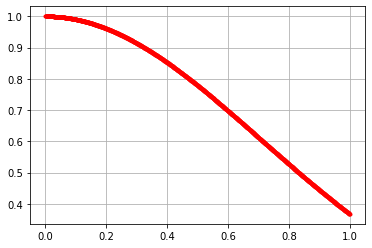

In [35]:
plt.plot(T, X, '.r')
plt.grid(True)

<IPython.core.display.Javascript object>


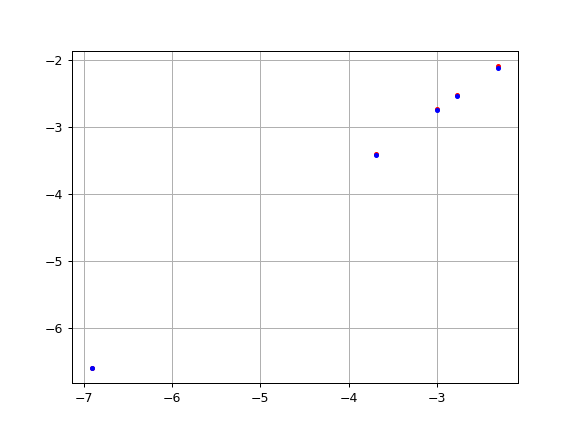

In [60]:
h = [0.1, 0.0625, 0.05, 0.025, 0.001]
N = [1/hh for hh in h]
x_0 = 1
t_0 = 0
t_f = 1
func = lambda t,x : x
X_f = []
for n in N:
    T, X = euler_explicito(func, x_0, t_0, t_f, int(n))
    X_f.append(np.log(abs(X[-1] - np.e)))
plt.plot(np.log(h), X_f, '.r')
X_f = []
func_t = func
func_x = lambda t,x : 1
for n in N:
    T, X = taylor_orden_2(func, func_t, func_x, x_0, t_0, t_f, int(n))
    X_f.append(np.log(abs(X[-1] - np.e)))
plt.plot(np.log(h), X_f, '.b')
plt.grid(True)
plt.show()

In [59]:
%matplotlib notebook

In [61]:
np.log(h)

array([-2.30258509, -2.77258872, -2.99573227, -3.68887945, -6.90775528])